In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

In [2]:
import h5py
def load_dataset():
    fn = 'data/train_signs.h5'
    train_dataset = h5py.File(fn, "r")
    X_train = np.array(train_dataset["train_set_x"][:]) # your train set features
    Y_train = np.array(train_dataset["train_set_y"][:]) # your train set labels

    fn = 'data/test_signs.h5'
    test_dataset =  h5py.File(fn, "r")
    X_test = np.array(test_dataset["test_set_x"][:]) # your test set features
    Y_test = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    Y_train = Y_train.reshape((1, Y_train.shape[0]))
    Y_test = Y_test.reshape((1, Y_test.shape[0]))
    
    return X_train, Y_train, X_test, Y_test, classes
train_data, train_labels, test_data, test_labels, classes = load_dataset()

print ('train_data.shape=', train_data.shape)
print ('train_labels.shape=',  train_labels.shape)
print ('test_data.shape=', test_data.shape)
print ('test_labels.shape=', test_labels.shape)
print(classes)

train_data.shape= (1080, 64, 64, 3)
train_labels.shape= (1, 1080)
test_data.shape= (120, 64, 64, 3)
test_labels.shape= (1, 120)
[0 1 2 3 4 5]


# Data Processing

In [4]:
train_data = train_data.mean(axis=-1) # RGB -> Gray
train_data = train_data.reshape(train_data.shape[0], -1)
train_data = train_data.astype('float32') / 255.0

test_data = test_data.mean(axis=-1) # RGB -> Gray
test_data = test_data.reshape(test_data.shape[0], -1)
test_data = test_data.astype('float32') / 255.0

print ('train_data.shape=', train_data.shape)
print ('test_data.shape=', test_data.shape)

train_data.shape= (1080, 4096)
test_data.shape= (120, 4096)


In [5]:
from tensorflow.keras.utils import to_categorical
train_labels = train_labels.squeeze() 
test_labels = test_labels.squeeze() 

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print ('train_labels.shape=',  train_labels.shape)
print ('test_labels.shape=', test_labels.shape)

train_labels.shape= (1080, 6)
test_labels.shape= (120, 6)


# Creating a model

In [7]:
nClasses = len(classes)

def create_model (activation, num_layers, dropout_rate):
    model = Sequential()
    model.add(Dense(100, activation=activation, input_shape=(4096,)))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    for _ in range(num_layers - 1):
        model.add(Dense(100, activation=activation))
        model.add(BatchNormalization())
        model.add(Dropout(dropout_rate))
    model.add(Dense(nClasses, activation='softmax'))
    return model

In [40]:
def plot_hist(history):
    plt.figure(figsize=[8,6])
    plt.plot(history.history['loss'],'r',linewidth=3.0)
    plt.plot(history.history['val_loss'],'b',linewidth=3.0)
    plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Loss',fontsize=16)
    plt.title('Loss Curves',fontsize=16)
     
    #Plot the Accuracy Curves
    plt.figure(figsize=[8,6])
    plt.plot(history.history['accuracy'],'r',linewidth=3.0)
    plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
    plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Accuracy',fontsize=16)
    plt.title('Accuracy Curves',fontsize=16)

# Running models

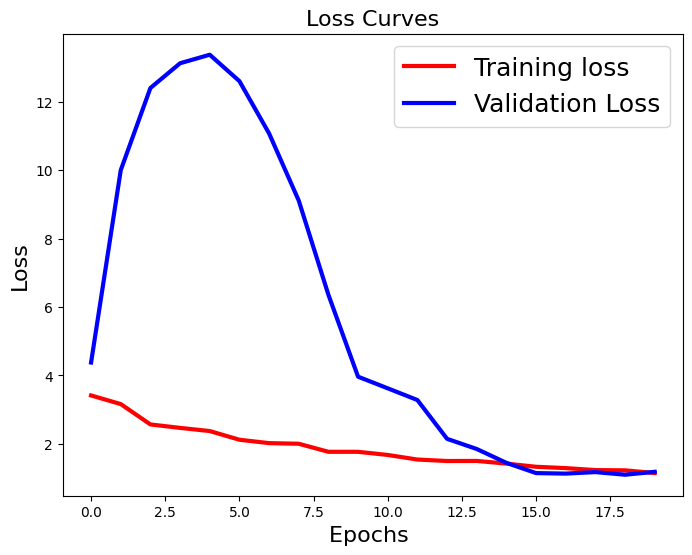

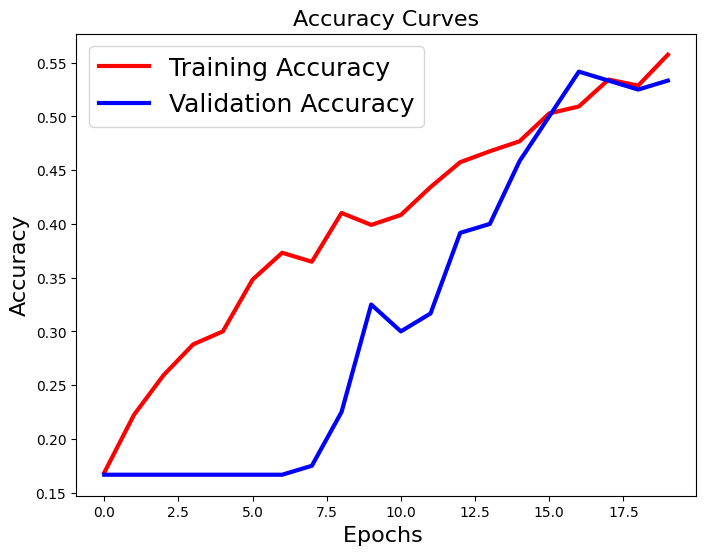

In [51]:
model_1 = create_model('relu', 3, 0.5)
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_1.fit(train_data, train_labels, batch_size=50, epochs=20, validation_data=(test_data, test_labels), verbose=False)
plot_hist(history)

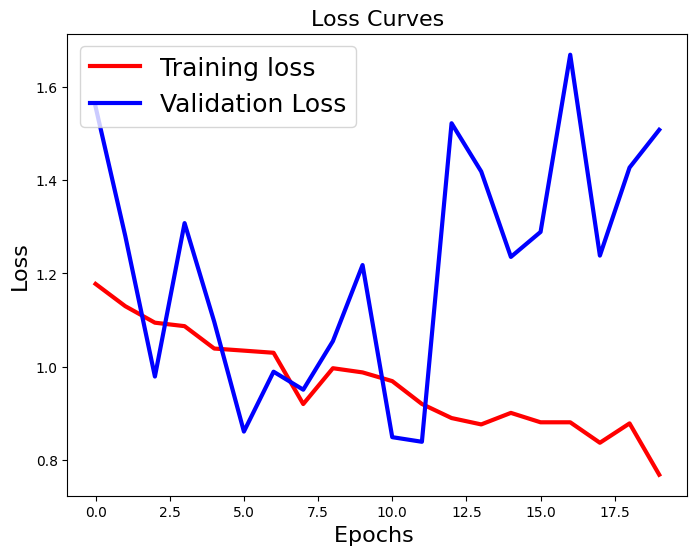

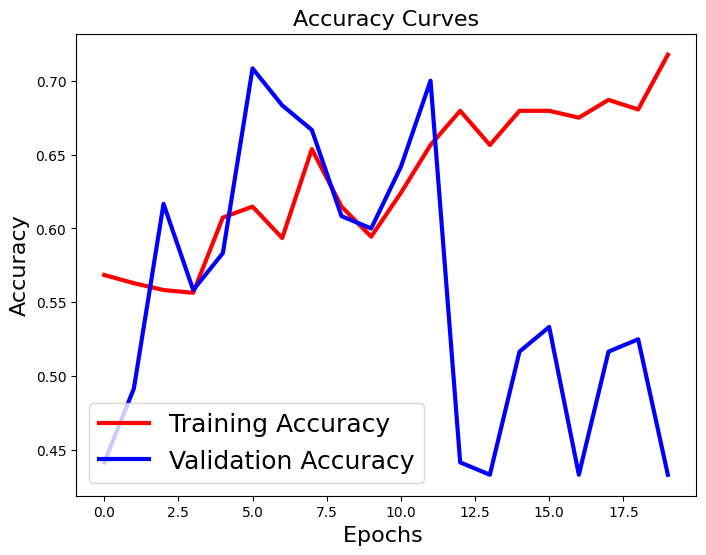

In [53]:
model_2 = create_model('tanh', 1, 0.5)
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_1.fit(train_data, train_labels, batch_size=50, epochs=20, validation_data=(test_data, test_labels), verbose=False)
plot_hist(history)

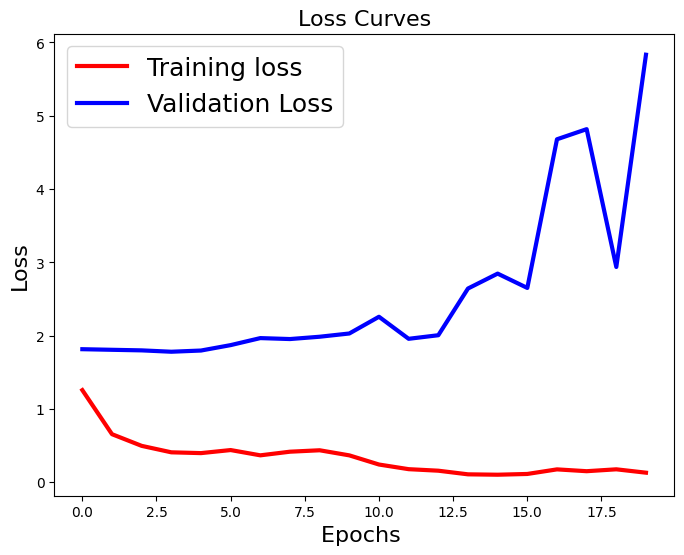

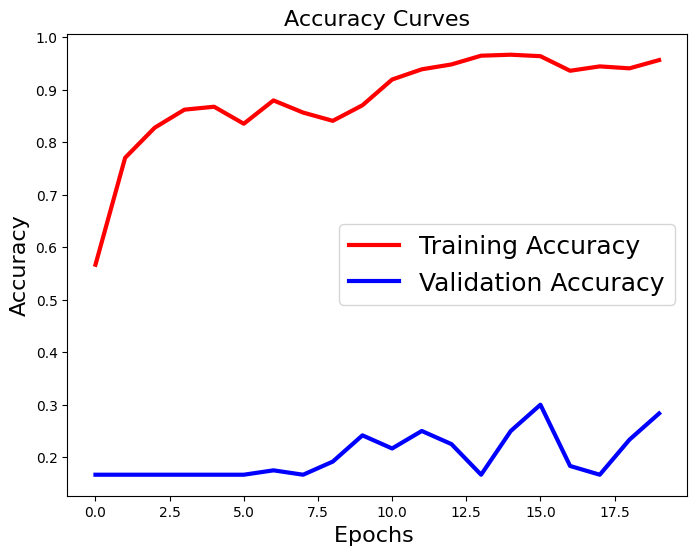

In [54]:
model_1 = create_model('sigmoid', 3, 0)
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_1.fit(train_data, train_labels, batch_size=50, epochs=20, validation_data=(test_data, test_labels), verbose=False)
plot_hist(history)